In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy

In [64]:
PARENT_PATH = os.path.dirname(os.getcwd())
PREPROCESSED_DATA_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Preprocessed-Data','CSV-Files','data.csv')
OUTPUT_PATH = os.path.join(PARENT_PATH, 'Data-Visualization','Outputs')


In [48]:
df = pd.read_csv(PREPROCESSED_DATA_PATH)
df = df[['Inside-Tempurature', 'Outside-Tempurature', 'Inside-Humidity', 'Outside-Humidity']]
df.head()

,Inside-Tempurature,Outside-Tempurature,Inside-Humidity,Outside-Humidity
0,29.98,30.68,81.61,81.26
1,33.36,33.53,68.36,75.31
2,32.71,33.52,70.72,77.19
3,31.97,33.68,72.42,78.18
4,31.65,33.33,70.83,74.15


In [49]:
df.describe()

,Inside-Tempurature,Outside-Tempurature,Inside-Humidity,Outside-Humidity
count,127.000000,127.000000,127.000000,127.000000
mean,29.301969,30.728110,81.044882,79.557008
std,1.922505,2.297067,7.392489,5.353561
min,26.950000,27.980000,66.700000,71.500000
25%,27.550000,28.555000,73.960000,74.400000
50%,28.830000,30.270000,81.660000,78.890000
75%,31.055000,33.220000,87.370000,84.630000
max,33.540000,35.050000,92.220000,87.990000


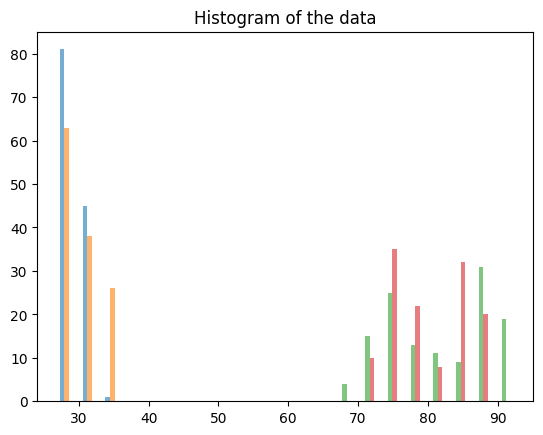

In [82]:
plt.figure(figsize=(8, 6))

In [51]:
temperature_df = df[['Inside-Tempurature', 'Outside-Tempurature']]
humidity_df = df[['Inside-Humidity', 'Outside-Humidity']]

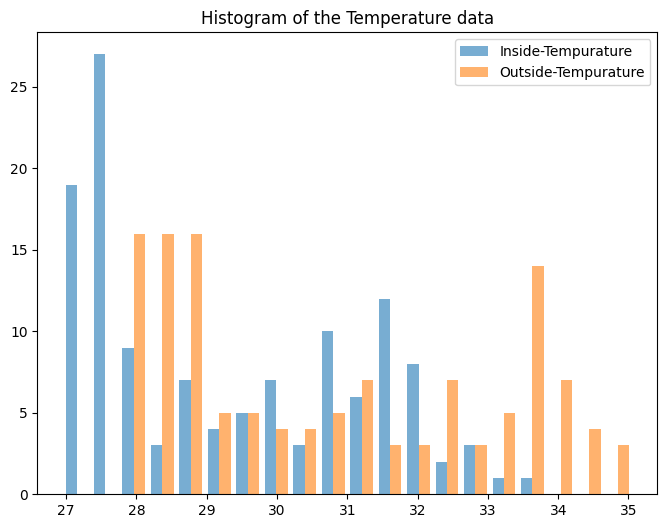

In [93]:

plt.title('Histogram of the Temperature data')
plt.hist(temperature_df.values, bins=20, alpha=0.6, label=['Inside-Tempurature', 'Outside-Tempurature'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Temperature-Histogram.png'), dpi=300)
plt.show()

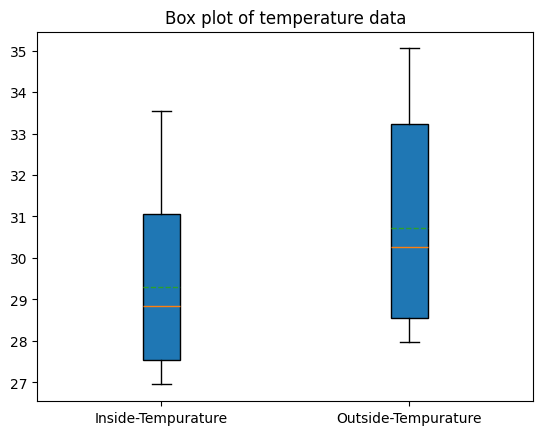

In [96]:
plt.title('Box plot of temperature data')
plt.boxplot(temperature_df.values, tick_labels=temperature_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Temp-Box-Plot.png",dpi=300)
plt.show()


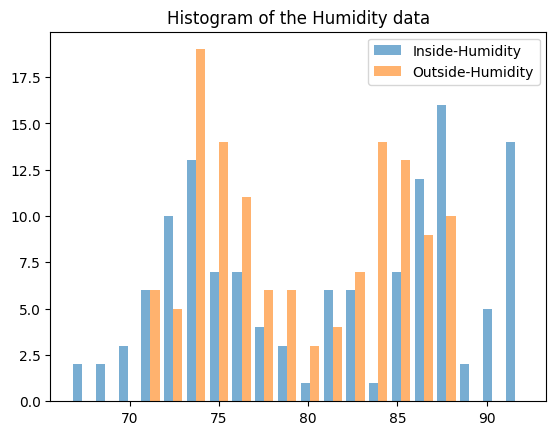

In [97]:
plt.title('Histogram of the Humidity data')
plt.hist(humidity_df.values, bins=20, alpha=0.6, label=['Inside-Humidity', 'Outside-Humidity'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Humidity-Histogram.png'), dpi=300)
plt.show()

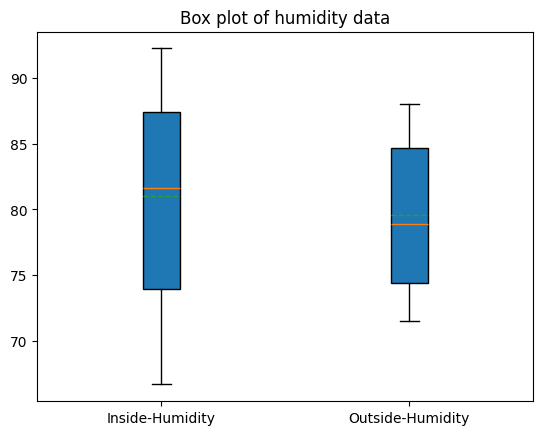

In [98]:
plt.title('Box plot of humidity data')
plt.boxplot(humidity_df.values, tick_labels=humidity_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Humidity-Box-Plot.png",dpi=300)
plt.show()

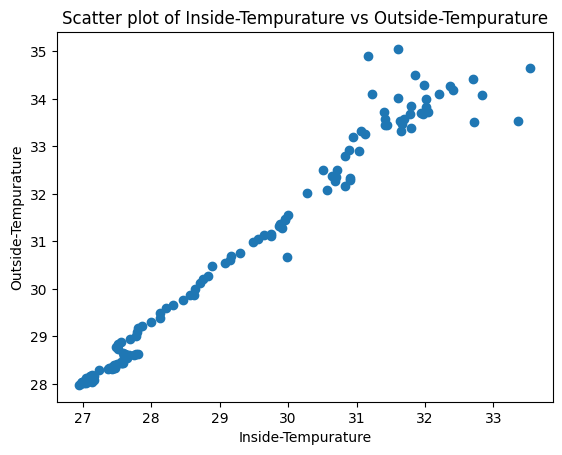

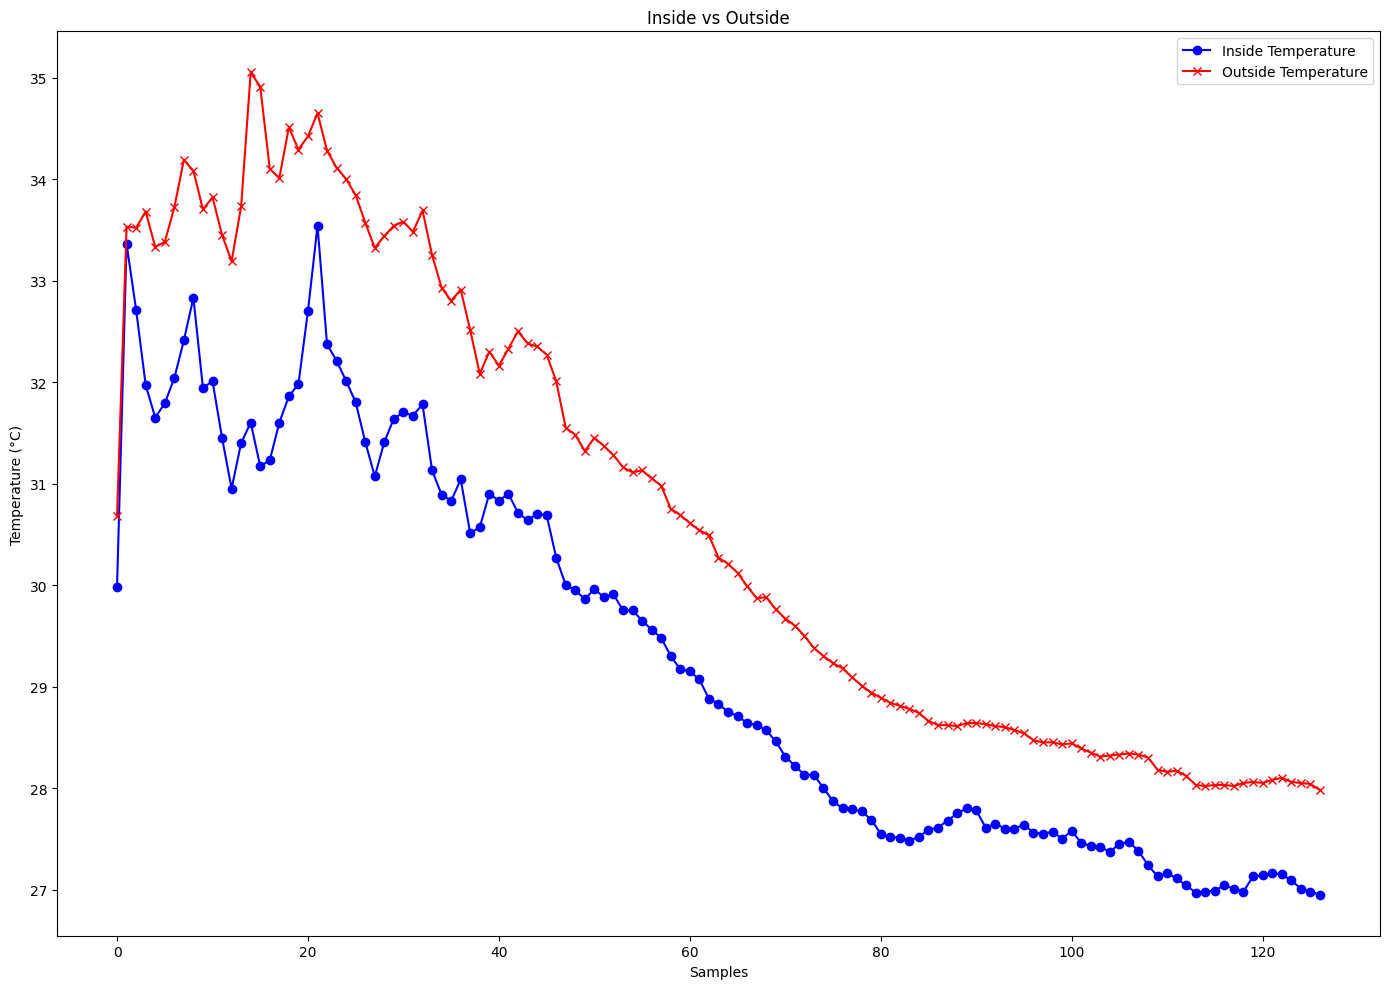

In [106]:
# Set up the figure for plotting
plt.figure(figsize=(14, 10))

plt.plot(df.index, df['Inside-Tempurature'], label='Inside Temperature', color='blue', marker='o')
plt.plot(df.index, df['Outside-Tempurature'], label='Outside Temperature', color='red', marker='x')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Temperature.png",dpi=300)
plt.show()

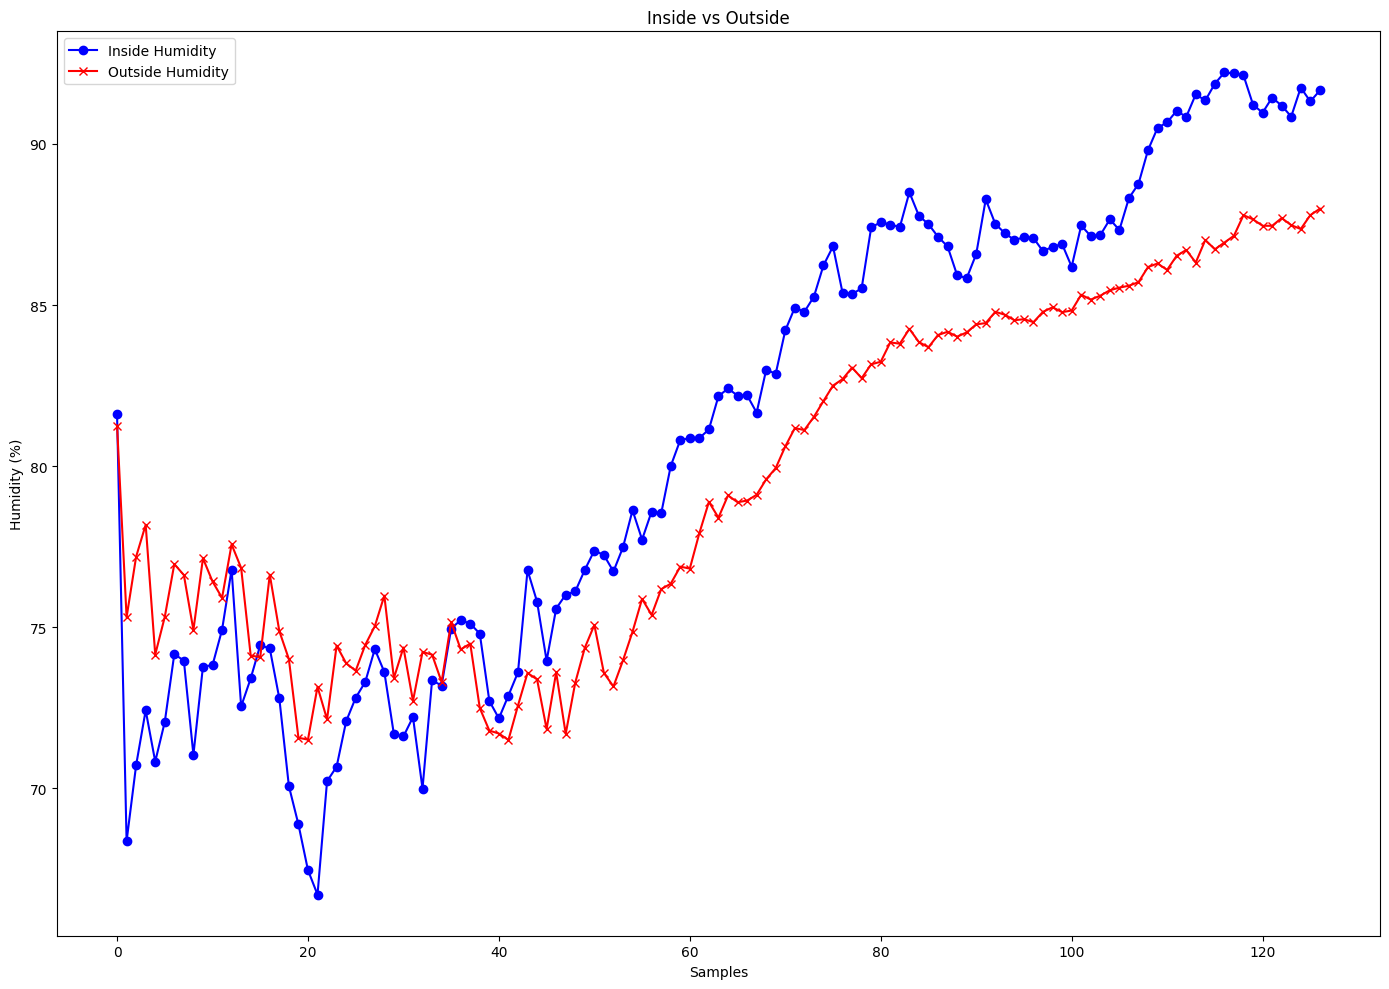

In [104]:
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['Inside-Humidity'], label='Inside Humidity', color='blue', marker='o')
plt.plot(df.index, df['Outside-Humidity'], label='Outside Humidity', color='red', marker='x')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Humidity.png",dpi=300)
plt.show()